Data Exploration and Analysis | DSC-530 T301 <br>
Jeremy Barton <br>
07.04.2025

<b>Appendix</b>

[Introduction](#introduction)

[Data Preparation](#data-preparation)

## Introduction

This paper will be analyzing responses from the Central Sensitization Inventory (CSI), consisting of 25 items and the Sensory Processing Sensitivity Questionnaire (SPSQ), consisting of 8 items. The objective is to support the hypothesis that symptoms found in adults 40+ have similar intensity to those responses from individuals 35 and under. According to the Cleavland Clinic, women and people older than 40 are more likely to be diagnoses with fibromyalgia.

These findings can help confirm or not that Fibromyalgia diagnoses have seen an increase in recent decades, or at the very least, the rising prominence in young adults.

### Data Preparation

Checking the shape of this dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in fibromyalgia questionaire data
response_data = pd.read_csv('data/responses.csv')

# Create CSI dataset from fibro_dataset.csv
csi_responses = response_data[['ID','group','sex','age','SES','CSI1','CSI2','CSI3','CSI4','CSI5','CSI6','CSI7','CSI8','CSI9','CSI10','CSI11','CSI12','CSI13','CSI14','CSI15','CSI16','CSI17','CSI18','CSI19','CSI20','CSI21','CSI22','CSI23','CSI24','CSI25']]
print(f"Shape of response dataset:", csi_responses.shape)

Shape of response dataset: (399, 30)


Checking the overall distribution of ages in the Control and Fibromyalgia groups.

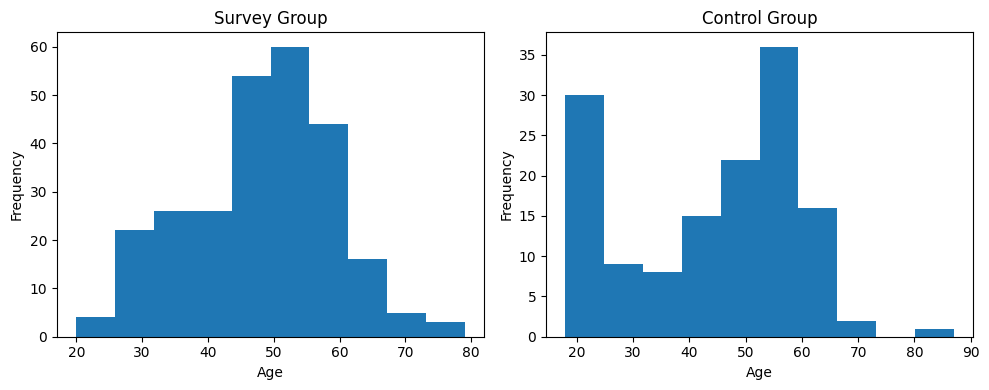

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Control == 1
axes[0].hist(response_data.loc[response_data['group'] == 1, 'age'])
axes[0].set_title('Survey Group')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Control == 0
axes[1].hist(response_data.loc[response_data['group'] == 0, 'age'])
axes[1].set_title('Control Group')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

It looks like the control group was set up according to the typical distribution of Fibromyalgia diagnosis ages. The survey group resembles more of a bell curve, which is good to see.

In [4]:
categories = csi_keys['option'].tolist()
categories

['Never', 'Rarely', 'Sometimes', 'Often', 'Always']

This tells us the average response per question by control or experimental group.

Now let's show what percentage of female experimental responses experience jaw pain 

In [ ]:
never_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1) &
    (csi_responses['CSI20'] == 0)
]

rarely_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1) &
    (csi_responses['CSI20'] == 1)
]

sometimes_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1) &
    (csi_responses['CSI20'] == 2)
]

often_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1) &
    (csi_responses['CSI20'] == 3)
]

always_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1) &
    (csi_responses['CSI20'] == 4)
]

all_fibro = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1)
]

counts = [
    never_pain['ID'].count(),
    rarely_pain['ID'].count(),
    sometimes_pain['ID'].count(),
    often_pain['ID'].count(),
    always_pain['ID'].count()
]


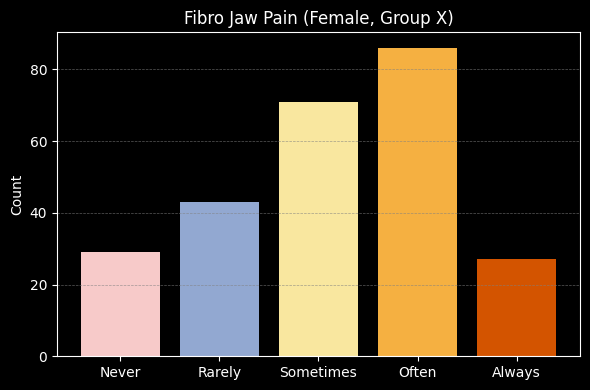

In [6]:
labels = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
colors = ['#f7cac9', '#92a8d1', '#f9e79f', '#f5b041', '#d35400']

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(labels, counts, color=colors)
ax.set_ylabel('Count')
ax.set_title('Fibro Jaw Pain (Female, Group X)')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
never_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 0) &
    (csi_responses['CSI20'] == 0)
]

rarely_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 0) &
    (csi_responses['CSI20'] == 1)
]

sometimes_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 0) &
    (csi_responses['CSI20'] == 2)
]

often_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 0) &
    (csi_responses['CSI20'] == 3)
]

always_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 0) &
    (csi_responses['CSI20'] == 4)
]

all_fibro = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 0)
]

counts = [
    never_pain['ID'].count(),
    rarely_pain['ID'].count(),
    sometimes_pain['ID'].count(),
    often_pain['ID'].count(),
    always_pain['ID'].count()
]


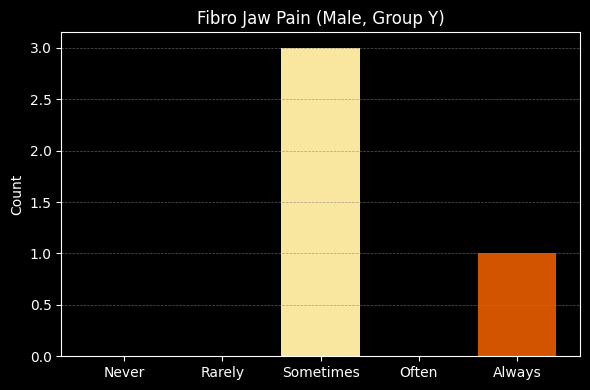

In [11]:
labels = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
colors = ['#f7cac9', '#92a8d1', '#f9e79f', '#f5b041', '#d35400']

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(labels, counts, color=colors)
ax.set_ylabel('Count')
ax.set_title('Fibro Jaw Pain (Male, Group Y)')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

Fields that include CSI and SQPQ represent answers to questions from the Central Sensitization Inventory (CSI) and Sensory Processing Sensitivity Questionnaire respectively.

In [7]:
categories = csi_keys.values.flatten().tolist()
categories

['Never', 'Rarely', 'Sometimes', 'Often', 'Always']

In [8]:
melted = csi_responses.melt(
    id_vars=csi_responses.columns.difference(questions),
    value_vars=questions,
    var_name="question",
    value_name="response"
)


NameError: name 'questions' is not defined